In [1]:
from src.visualize import plot_pace_decay
from src.utils import get_pace

### Pace Model

We define the adjusted distance $D^*$ as:

$$
D^* = d + \frac{D^+}{100}
$$

Where:  
- $d$ is the actual distance in kilometers  
- $D^+$ is the positive elevation gain in meters

---

The **base pace** (ignoring elevation) is modeled as an exponential function of adjusted distance:

$$
\text{GAP}(D^*) = p_0 \cdot e^{k(D^* - 21)}
$$

Where:  
- $p_0$ is the base half marathon pace (in min/km), e.g., $p_0 = 3.67$  
- $k$ is the endurance decay rate (e.g., $0.002$–$0.006$)  
- $D^* \geq 21$ km

Note: *Observe that practically, for our distance ranges (30-70km) and endurance coefficient, the exponential argument is close to zero, then we can approximate it linearly making the model objective quadratic (i.e., treatable).*

---

The **final pace** is given by:

$$
\text{pace} = \text{GAP}(D^*) + K^+ \cdot D^+ + K^- \cdot D^- + P_{\text{night}}
$$

Where:  
- $D^-$ is the negative elevation (descent) in meters  
- $K^+$, $K^-$ are the uphill/downhill penalty coefficients (min/km per meter)  
- $P_{\text{night}}$ is a night penalty (in min/km), added if the segment is during nighttime

---

Each runner is characterized by differnt $k$, $K^+$, $K^-$, and $P_{\text{night}}$ values.

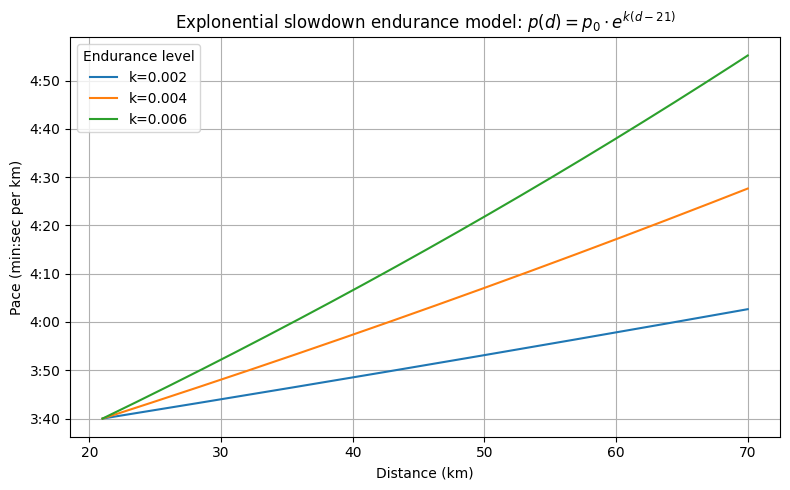

In [2]:
pace_HM = 3*60 + 40 # 3:40/km
k_values = [0.002, 0.004, 0.006]
plot_pace_decay(pace_HM, k_values)

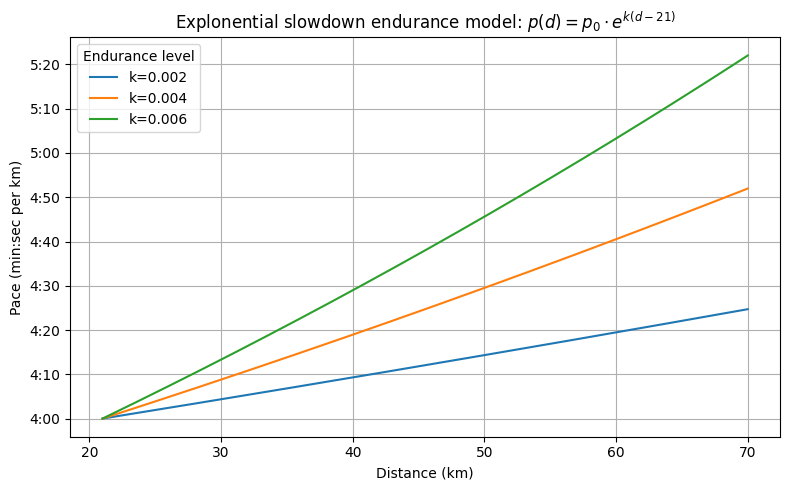

In [6]:
pace_HM = 4*60  # 4:00/km
k_values = [0.002, 0.004, 0.006]
plot_pace_decay(pace_HM, k_values)

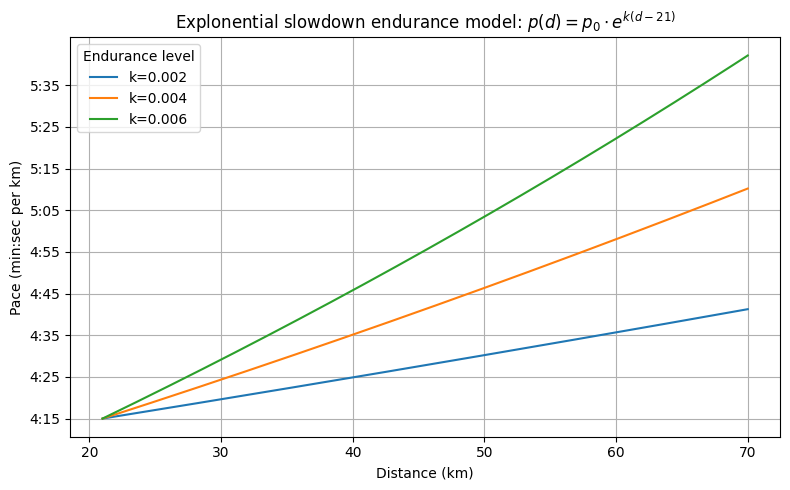

In [7]:
pace_HM = 4*60 + 15 # 4:15/km
k_values = [0.002, 0.004, 0.006]
plot_pace_decay(pace_HM, k_values)

In [8]:
get_pace()

,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90
Runner,,,,,,,,,,,,,,,
Florian,3:30,3:32,3:34,3:36,3:38,3:40,3:42,3:44,3:46,3:48,3:51,3:53,3:55,3:57,3:59
Esther,4:09,4:14,4:19,4:24,4:29,4:34,4:39,4:44,4:49,4:54,4:59,5:04,5:09,5:14,5:19
Monika,4:19,4:24,4:29,4:34,4:40,4:45,4:50,4:55,5:00,5:06,5:11,5:16,5:21,5:26,5:32
Paul,3:29,3:32,3:36,3:39,3:42,3:45,3:48,3:51,3:55,3:58,4:01,4:04,4:07,4:10,4:13
Alex,3:39,3:43,3:46,3:49,3:52,3:56,3:59,4:02,4:06,4:09,4:12,4:16,4:19,4:22,4:25
Riccardo,3:40,3:42,3:44,3:46,3:48,3:51,3:53,3:55,3:57,3:59,4:02,4:04,4:06,4:08,4:10
Anton,3:39,3:43,3:46,3:49,3:52,3:56,3:59,4:02,4:06,4:09,4:12,4:16,4:19,4:22,4:25
Benjamin,3:44,3:48,3:52,3:56,3:60,4:04,4:08,4:12,4:16,4:20,4:24,4:27,4:31,4:35,4:39
